In [13]:
! wget -r "http://archive.luftdaten.info/2018-01-18/"

--2018-01-19 07:19:08--  http://archive.luftdaten.info/2018-01-18/
Resolving archive.luftdaten.info (archive.luftdaten.info)... 85.214.67.97, 81.169.180.11, 2a01:238:4259:b400:1e5d:9714:fa8b:6155
Connecting to archive.luftdaten.info (archive.luftdaten.info)|85.214.67.97|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘archive.luftdaten.info/2018-01-18/index.html’

    [        <=>                            ] 1,532,514    808KB/s   in 1.9s   

2018-01-19 07:19:11 (808 KB/s) - ‘archive.luftdaten.info/2018-01-18/index.html’ saved [1532514]

Loading robots.txt; please ignore errors.
--2018-01-19 07:19:12--  http://archive.luftdaten.info/robots.txt
Reusing existing connection to archive.luftdaten.info:80.
HTTP request sent, awaiting response... 404 Not Found
2018-01-19 07:19:12 ERROR 404: Not Found.

--2018-01-19 07:19:12--  http://archive.luftdaten.info/icons/blank.gif
Reusing existing connection to archive.luftdaten.info:80.
HTT

In [17]:
! cd archive.luftdaten.info

In [20]:
! ls archive.luftdaten.info/2018-01-18

2018-01-18_bme280_sensor_1093.csv  2018-01-18_dht22_sensor_3160.csv
2018-01-18_bme280_sensor_113.csv   2018-01-18_dht22_sensor_3162.csv
2018-01-18_bme280_sensor_1207.csv  2018-01-18_dht22_sensor_3168.csv
2018-01-18_bme280_sensor_1357.csv  2018-01-18_dht22_sensor_3170.csv
2018-01-18_bme280_sensor_141.csv   2018-01-18_dht22_sensor_3172.csv
2018-01-18_bme280_sensor_1472.csv  2018-01-18_dht22_sensor_3174.csv
2018-01-18_bme280_sensor_1482.csv  2018-01-18_dht22_sensor_3176.csv
2018-01-18_bme280_sensor_1652.csv  2018-01-18_dht22_sensor_3178.csv
2018-01-18_bme280_sensor_1690.csv  2018-01-18_dht22_sensor_3182.csv
2018-01-18_bme280_sensor_1726.csv  2018-01-18_dht22_sensor_3184.csv
2018-01-18_bme280_sensor_1744.csv  2018-01-18_dht22_sensor_3186.csv
2018-01-18_bme280_sensor_1764.csv  2018-01-18_dht22_sensor_318.csv
2018-01-18_bme280_sensor_1770.csv  2018-01-18_dht22_sensor_3190.csv
2018-01-18_bme280_sensor_1776.csv  2018-01-18_dht22_sensor_3194.csv
2018-01-18_bme280_sensor_1846.csv  2018-01-18_dht

In [1]:
import os
dir_names = []

for dirname, dirnames, filenames in os.walk('./archive.luftdaten.info/2018-01-18'):
    # print path to all subdirectories first.
    for subdirname in dirnames:
        path = os.path.join(dirname, subdirname)
        dir_names.append(path)

In [2]:
dir = "./archive.luftdaten.info/2018-01-18/"
df_result = spark.read.option("header", "true").option("delimiter", ";").csv(dir+"/*dht22*.csv")
for dir in dir_names:
    try:
        df = spark.read.option("header", "true").option("delimiter", ";").csv(dir+"/*dht22*.csv")
        
        df_result = df_result.union(df)
    except Exception as e:
        print "This path doesn't seem to contain dht22 sensor data: %s"%dir
        print e
    
    


In [3]:
df_result.show()

+---------+-----------+--------+------+-----+-------------------+-----------+--------+
|sensor_id|sensor_type|location|   lat|  lon|          timestamp|temperature|humidity|
+---------+-----------+--------+------+-----+-------------------+-----------+--------+
|     4741|      DHT22|    2384|48.745|9.118|2018-01-18T00:00:00|       7.20|   52.10|
|     4741|      DHT22|    2384|48.745|9.118|2018-01-18T00:00:10|       7.20|   52.00|
|     4741|      DHT22|    2384|48.745|9.118|2018-01-18T00:00:20|       7.20|   52.00|
|     4741|      DHT22|    2384|48.745|9.118|2018-01-18T00:00:29|       7.20|   52.00|
|     4741|      DHT22|    2384|48.745|9.118|2018-01-18T00:00:39|       7.20|   52.00|
|     4741|      DHT22|    2384|48.745|9.118|2018-01-18T00:00:49|       7.20|   52.00|
|     4741|      DHT22|    2384|48.745|9.118|2018-01-18T00:00:59|       7.10|   51.90|
|     4741|      DHT22|    2384|48.745|9.118|2018-01-18T00:01:09|       7.20|   52.00|
|     4741|      DHT22|    2384|48.745|9.11

In [4]:
df_timestamp_temp = df_result.select('timestamp','temperature').withColumn("temp", df_result.temperature.cast("double")).drop("temperature")




In [5]:
!pip install pixiedust

In [6]:
import pixiedust

Pixiedust database opened successfully


In [7]:
df_filtered = df_result.filter("location = 2384")

In [8]:
df_num = df_filtered.select(df_filtered.timestamp,df_filtered.temperature.cast("float"),df_filtered.humidity.cast("float"))

In [9]:
df_num.show()

+-------------------+-----------+--------+
|          timestamp|temperature|humidity|
+-------------------+-----------+--------+
|2018-01-18T00:00:00|        7.2|    52.1|
|2018-01-18T00:00:10|        7.2|    52.0|
|2018-01-18T00:00:20|        7.2|    52.0|
|2018-01-18T00:00:29|        7.2|    52.0|
|2018-01-18T00:00:39|        7.2|    52.0|
|2018-01-18T00:00:49|        7.2|    52.0|
|2018-01-18T00:00:59|        7.1|    51.9|
|2018-01-18T00:01:09|        7.2|    52.0|
|2018-01-18T00:01:18|        7.2|    52.0|
|2018-01-18T00:01:29|        7.2|    52.1|
|2018-01-18T00:01:38|        7.1|    52.0|
|2018-01-18T00:01:48|        7.1|    52.0|
|2018-01-18T00:01:58|        7.1|    52.0|
|2018-01-18T00:02:07|        7.2|    52.1|
|2018-01-18T00:02:18|        7.1|    52.0|
|2018-01-18T00:02:27|        7.1|    52.0|
|2018-01-18T00:02:38|        7.1|    52.1|
|2018-01-18T00:02:48|        7.1|    52.1|
|2018-01-18T00:02:58|        7.1|    52.1|
|2018-01-18T00:03:08|        7.1|    52.1|
+----------


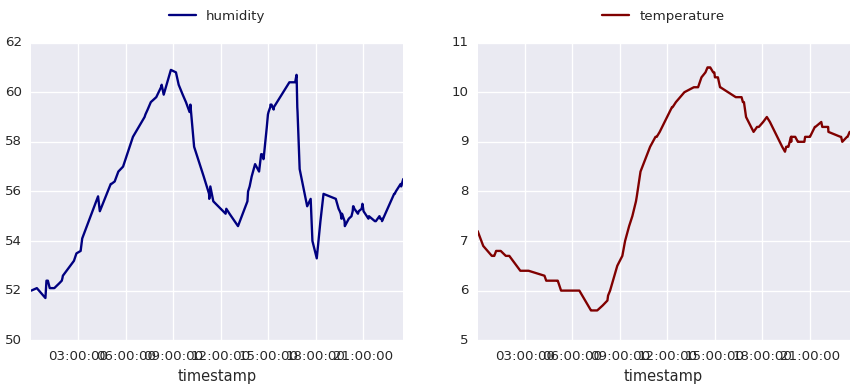

In [10]:
display(df_num)

In [11]:
df_map = df_result.select(df_filtered.lat.cast("float"), df_result.lon.cast("float"),df_result.temperature.cast("float"),df_result.humidity.cast("float"))

In [12]:
display(df_map)

In [26]:
df_timestamp_temp.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- temp: double (nullable = true)



In [27]:
df_timestamp_temp.count()

1037238

In [ ]:
from pyspark.sql import functions as F
format = "yyyy-MM-dd'T'HH:mm:ss"
df_ts_uts_temp = df_timestamp_temp.withColumn('ts', F.unix_timestamp('timestamp', format).cast('timestamp')).withColumn('uts', F.unix_timestamp('timestamp', format)).drop("timestamp")




In [ ]:
df_ts_uts_temp.show()

In [ ]:
display(df_ts_uts_temp)

In [ ]:
df_ts_uts_temp_add_feat = df_ts_uts_temp \
.withColumn("day_of_month",F.dayofmonth('ts')) \
.withColumn("dayof_year",F.dayofyear('ts')) \
.withColumn("month",F.month('ts'))


In [ ]:
df_ts_uts_temp_add_feat.show()

In [ ]:
display(df_ts_uts_temp_add_feat)

In [ ]:
df_ts_uts_temp_add_feat.write.parquet("archive.luftdaten.info.df_ts_uts_temp_add_feat.parquet")

In [7]:

import ibmos2spark

# @hidden_cell
credentials = {
    'auth_url': 'https://identity.open.softlayer.com',
    'project_id': '6aaf54352357483486ee2d4981f8ef15',
    'region': 'dallas',
    'user_id': '8659881f7846412188712d97ccee59b1',
    'username': 'member_da54c0bc59e0c60e5dde85e4c1298ebee56dd1b1',
    'password': 'B5A_IZ^8sG/D~-,i'
}

configuration_name = 'os_d3bd5b94a9334de59a55a7fed2bedeaa_configs'
bmos = ibmos2spark.bluemix(sc, credentials, configuration_name)

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

# Please read the documentation of PySpark to learn more about the possibilities to load data files.
# PySpark documentation: https://spark.apache.org/docs/1.6.0/api/python/pyspark.sql.html#pyspark.sql.SQLContext
# The SQLContext object is already initalized for you.
# The following variable contains the path to your file on your Object Storage.
path_1 = bmos.url('ticont', 'part-00000-3884cac2-290d-431a-9a9e-04cbf1c384c4.snappy.parquet')



In [8]:
df_ts_uts_temp_add_feat_parquet = spark.read.parquet(path_1)

Py4JJavaError: An error occurred while calling o140.parquet.
: Command exception, HTTP Status code: 403 => ACCESS_FORBIDDEN
	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:88)
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:57)
	at java.lang.reflect.Constructor.newInstance(Constructor.java:436)
	at org.javaswift.joss.shade.exception.HttpStatusToExceptionMapper.getException(HttpStatusToExceptionMapper.java:48)
	at org.javaswift.joss.shade.exception.HttpStatusExceptionUtil.getException(HttpStatusExceptionUtil.java:16)
	at org.javaswift.joss.shade.exception.HttpStatusExceptionUtil.throwException(HttpStatusExceptionUtil.java:10)
	at org.javaswift.joss.shade.command.impl.core.httpstatus.HttpStatusChecker.isOk(HttpStatusChecker.java:30)
	at org.javaswift.joss.shade.command.impl.core.httpstatus.HttpStatusChecker.verifyCode(HttpStatusChecker.java:39)
	at org.javaswift.joss.shade.command.impl.core.AbstractCommand.call(AbstractCommand.java:50)
	at org.javaswift.joss.shade.command.impl.core.AbstractSecureCommand.call(AbstractSecureCommand.java:31)
	at org.javaswift.joss.shade.client.core.AbstractContainer.getInfo(AbstractContainer.java:235)
	at org.javaswift.joss.shade.client.core.AbstractObjectStoreEntity.checkForInfo(AbstractObjectStoreEntity.java:98)
	at org.javaswift.joss.shade.client.core.AbstractObjectStoreEntity.checkForInfoDisallowErrorLog(AbstractObjectStoreEntity.java:93)
	at org.javaswift.joss.shade.client.core.AbstractObjectStoreEntity.exists(AbstractObjectStoreEntity.java:110)
	at com.ibm.stocator.fs.swift.SwiftAPIClient.initiate(SwiftAPIClient.java:297)
	at com.ibm.stocator.fs.ObjectStoreVisitor.getStoreClient(ObjectStoreVisitor.java:130)
	at com.ibm.stocator.fs.ObjectStoreFileSystem.initialize(ObjectStoreFileSystem.java:95)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:2669)
	at org.apache.hadoop.fs.FileSystem.access$200(FileSystem.java:94)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:2703)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:2685)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:373)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:295)
	at org.apache.spark.sql.execution.datasources.DataSource$$anonfun$14.apply(DataSource.scala:372)
	at org.apache.spark.sql.execution.datasources.DataSource$$anonfun$14.apply(DataSource.scala:370)
	at scala.collection.TraversableLike$$anonfun$flatMap$1.apply(TraversableLike.scala:241)
	at scala.collection.TraversableLike$$anonfun$flatMap$1.apply(TraversableLike.scala:241)
	at scala.collection.immutable.List.foreach(List.scala:381)
	at scala.collection.TraversableLike$class.flatMap(TraversableLike.scala:241)
	at scala.collection.immutable.List.flatMap(List.scala:344)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:370)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:152)
	at org.apache.spark.sql.DataFrameReader.parquet(DataFrameReader.scala:441)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:95)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:55)
	at java.lang.reflect.Method.invoke(Method.java:507)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:785)


In [18]:
df_ts_uts_temp_add_feat_parquet = df_ts_uts_temp_add_feat_parquet.repartition(1)

In [19]:
#df_ts_uts_temp_add_feat_parquet.write.parquet("archive.luftdaten.info.df_ts_uts_temp_add_feat.1.parquet")

In [3]:
#hack/samples
df_ts_uts_temp_add_feat_parquet = df_ts_uts_temp_add_feat_parquet.sample(True, 0.01)

In [4]:
df_ts_uts_temp_add_feat_parquet_not_null = df_ts_uts_temp_add_feat_parquet \
.where(df_ts_uts_temp_add_feat_parquet.day_of_month.isNotNull()) \
.where(df_ts_uts_temp_add_feat_parquet.dayof_year.isNotNull()) \
.where(df_ts_uts_temp_add_feat_parquet.month.isNotNull()) \
.where(df_ts_uts_temp_add_feat_parquet.temp.isNotNull()) \
.withColumnRenamed("temp","label")

In [5]:
from pyspark.ml.feature import OneHotEncoder, VectorAssembler

categorical_columns= ['day_of_month', 'dayof_year', 'month']
encoders = [OneHotEncoder(dropLast=False,inputCol=column,
            outputCol="{0}_encoded".format(column)) 
    for column in categorical_columns
]

In [6]:
assembler = VectorAssembler(inputCols=[
  encoder.getOutputCol() for encoder in encoders
],outputCol="features")

In [7]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=encoders+[assembler])

In [8]:
model = pipeline.fit(df_ts_uts_temp_add_feat_parquet_not_null)

In [9]:
df_transformed = model.transform(df_ts_uts_temp_add_feat_parquet_not_null)

In [10]:
df_transformed.show()

+-----+--------------------+----------+------------+----------+-----+--------------------+------------------+--------------+--------------------+
|label|                  ts|       uts|day_of_month|dayof_year|month|day_of_month_encoded|dayof_year_encoded| month_encoded|            features|
+-----+--------------------+----------+------------+----------+-----+--------------------+------------------+--------------+--------------------+
| 17.6|2017-08-08 17:21:...|1502230862|           9|       221|    8|      (32,[9],[1.0])| (367,[221],[1.0])|(13,[8],[1.0])|(412,[9,253,407],...|
| 17.6|2017-08-08 17:32:...|1502231525|           9|       221|    8|      (32,[9],[1.0])| (367,[221],[1.0])|(13,[8],[1.0])|(412,[9,253,407],...|
| 17.5|2017-08-08 17:32:...|1502231543|           9|       221|    8|      (32,[9],[1.0])| (367,[221],[1.0])|(13,[8],[1.0])|(412,[9,253,407],...|
| 17.4|2017-08-08 17:48:...|1502232492|           9|       221|    8|      (32,[9],[1.0])| (367,[221],[1.0])|(13,[8],[1.0])|

In [11]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [12]:
gbt = GBTRegressor(featuresCol="features", maxIter=10)



In [ ]:
# Chain indexer and GBT in a Pipeline
pipeline = Pipeline(stages=[gbt])



In [ ]:
# Train model.  This also runs the indexer.
model = pipeline.fit(df_transformed)



In [ ]:
# Make predictions.
predictions = model.transform(df_transformed)



In [ ]:
df_transformed.printSchema()

root
 |-- label: double (nullable = true)
 |-- ts: timestamp (nullable = true)
 |-- uts: long (nullable = true)
 |-- day_of_month: integer (nullable = true)
 |-- dayof_year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day_of_month_encoded: vector (nullable = true)
 |-- dayof_year_encoded: vector (nullable = true)
 |-- month_encoded: vector (nullable = true)
 |-- features: vector (nullable = true)



In [ ]:
display(predictions)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

+------------------+-----+--------------------+
|        prediction|label|            features|
+------------------+-----+--------------------+
|21.993505198649427| 17.5|(412,[9,253,407],...|
|21.993505198649427| 17.6|(412,[9,253,407],...|
|21.993505198649427| 17.6|(412,[9,253,407],...|
|21.993505198649427| 17.5|(412,[9,253,407],...|
|21.993505198649427| 17.5|(412,[9,253,407],...|
+------------------+-----+--------------------+
only showing top 5 rows



In [35]:
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)



Root Mean Squared Error (RMSE) on test data = 244.088


In [36]:
gbtModel = model.stages[0]
print(gbtModel)  # summary only

GBTRegressionModel (uid=GBTRegressor_4b9e99769b26b2794ad5) with 10 trees


In [ ]:
predictions = model.transform(df_transformed)

In [45]:
single = spark.createDataFrame(df_transformed.rdd.take(1))

In [46]:
single.show()

+-----+--------------------+----------+------------+----------+-----+--------------------+------------------+--------------+--------------------+
|label|                  ts|       uts|day_of_month|dayof_year|month|day_of_month_encoded|dayof_year_encoded| month_encoded|            features|
+-----+--------------------+----------+------------+----------+-----+--------------------+------------------+--------------+--------------------+
| 17.5|2017-08-09 00:27:...|1502231227|           9|       221|    8|      (32,[9],[1.0])| (367,[221],[1.0])|(13,[8],[1.0])|(412,[9,253,407],...|
+-----+--------------------+----------+------------+----------+-----+--------------------+------------------+--------------+--------------------+



In [47]:
predictions = model.transform(single)

In [48]:
predictions.show()

+-----+--------------------+----------+------------+----------+-----+--------------------+------------------+--------------+--------------------+------------------+
|label|                  ts|       uts|day_of_month|dayof_year|month|day_of_month_encoded|dayof_year_encoded| month_encoded|            features|        prediction|
+-----+--------------------+----------+------------+----------+-----+--------------------+------------------+--------------+--------------------+------------------+
| 17.5|2017-08-09 00:27:...|1502231227|           9|       221|    8|      (32,[9],[1.0])| (367,[221],[1.0])|(13,[8],[1.0])|(412,[9,253,407],...|21.993505198649427|
+-----+--------------------+----------+------------+----------+-----+--------------------+------------------+--------------+--------------------+------------------+

